In [16]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt


# CIRCUITO SÉRIE:


### a. Declare as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [4]:
#Resistências 
R1 = 0.5
R2 = 0.5

#Indutâncias
L1 = 1e-6
L2 = 1e-6

#Capacitâncias
C1 = 1e-6
C2 = 1e-6

#Frequências 
f = 36000 #Gabriel amigo do Vini falou que o Carrarreto falou na sala deles (CHECAR)

#Tensões
V1 = 5*2/np.pi

#Frequência Angular:
w = 2*np.pi*f

ka = 0.2 #fator de acoplamento CHECAR
M = ka*((L1*L2)**(1/2))



#Reatâncias
XL1 = w*L1*1j
XL2 = w*L2*1j

XM = 1j*w*M

XC1 = 1/(1j*w*C1)
XC2 = 1/(1j*w*C2)




In [5]:
#Valores da capacitância
capacitancias = [1.5e-7, 1e-7, 4.7e-7, 1e-6, 4.7e-6]

#valores da frequência
frequencias = list(range(100, 100001, 100))

#Valores da frequencia de resonancia
frequencias_resonancias = []




In [6]:
def CalculaResistenciaBobina(Uf):
    Zdc=[R1+XL1, XL2+R2]
    return Zdc[0], Zdc[1]

In [7]:
R_bobinas = []
Rdc1, Rdc2 = CalculaResistenciaBobina(V1)

for f in frequencias:
    R_bobina1 = Rdc1 + (Rdc1 * f * 1e-5)
    R_bobina2 = Rdc2 + (Rdc2 * f * 1e-5)
    R_bobinas.append([R_bobina1, R_bobina2, f])

print(R_bobinas)

[[(0.5005+0.22642086572952358j), (0.5005+0.22642086572952358j), 100], [(0.501+0.22664706040058205j), (0.501+0.22664706040058205j), 200], [(0.5015+0.2268732550716405j), (0.5015+0.2268732550716405j), 300], [(0.502+0.22709944974269897j), (0.502+0.22709944974269897j), 400], [(0.5025+0.22732564441375744j), (0.5025+0.22732564441375744j), 500], [(0.503+0.2275518390848159j), (0.503+0.2275518390848159j), 600], [(0.5035+0.22777803375587435j), (0.5035+0.22777803375587435j), 700], [(0.504+0.22800422842693283j), (0.504+0.22800422842693283j), 800], [(0.5045+0.2282304230979913j), (0.5045+0.2282304230979913j), 900], [(0.505+0.22845661776904977j), (0.505+0.22845661776904977j), 1000], [(0.5055+0.2286828124401082j), (0.5055+0.2286828124401082j), 1100], [(0.506+0.22890900711116668j), (0.506+0.22890900711116668j), 1200], [(0.5065+0.22913520178222516j), (0.5065+0.22913520178222516j), 1300], [(0.507+0.22936139645328363j), (0.507+0.22936139645328363j), 1400], [(0.5075+0.22958759112434207j), (0.5075+0.22958759

In [8]:
def CalcularTransformadorSerie(Uf, Rc, Rbobina1, Rbobina2):
    Z=np.array([[R_bobina1+XC1, -XM],[-XM, R_bobina2+Rc+XC2]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = i[1].real *Rc
    voltagem_2_irreal = i[1].imag *Rc
    return i[0], i[1], voltagem_2, voltagem_2_irreal

In [9]:
def CalcularTransformadorParalelo(Uf, Rc, Rbobina1, Rbobina2):
    Xep = (Rc*XC2)/(Rc+XC2)
    Z=np.array([[R_bobina1+XC1, -XM],[-XM, R_bobina2+Xep]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = i[1].real*Xep
    voltagem_2_irreal = i[1].imag*Xep
    return i[0], i[1], voltagem_2, voltagem_2_irreal

In [10]:
#Calcula o valor da indutância dependendo da capacitância e da frequência angular:
def CalculaIndutância(C,w):
    L = 1/((w**2)*C)
    return L

#Calcula o valor da Frequência Angular dependendo da frequência
def CalculaFrequenciaAngular(f):
    w = 2*np.pi*f
    return w

In [11]:
RC = 5 # O que o prof faz no código do Lab --> NÂO TEMOS CERTEZA
frequencias_dic = {}
for resistencias in R_bobinas:
    R_bobina1 = resistencias[0]
    R_bobina2 = resistencias[1]
    f = resistencias[2]
    i1s, i2s, V2s, V2si = CalcularTransformadorSerie(V1,RC, R_bobina1, R_bobina2)
    i1p, i2p, V2p, V2pi = CalcularTransformadorParalelo(V1,RC, R_bobina1, R_bobina2)
    frequencias_dic[f] = [i1s, i2s, V2s, V2si], [i1p, i2p, V2p, V2pi]
    print(f'----------------------------------\nPARALELO (f: {f}Hz) \no valor de i1 é: {i1p.round(4)} \no valor de i2 é: {i2p.round(4)} \no valor de V2 é: {V2p.round(4)} \n')
    print(f'SERIE \no valor de i1 é: {i1s.round(4)} \no valor de i2 é: {i2s.round(4)} \no valor de V2 é: {V2s.round(4)} \n----------------------------------\n')

----------------------------------
PARALELO (f: 100Hz) 
o valor de i1 é: (0.0894+0.7483j) 
o valor de i2 é: (-0.0081-0.0053j) 
o valor de V2 é: (-0.0178+0.0202j) 

SERIE 
o valor de i1 é: (0.0893+0.7482j) 
o valor de i2 é: (-0.0042-0.0025j) 
o valor de V2 é: -0.0212 
----------------------------------

----------------------------------
PARALELO (f: 200Hz) 
o valor de i1 é: (0.0895+0.7483j) 
o valor de i2 é: (-0.0081-0.0053j) 
o valor de V2 é: (-0.0178+0.0202j) 

SERIE 
o valor de i1 é: (0.0894+0.7483j) 
o valor de i2 é: (-0.0042-0.0025j) 
o valor de V2 é: -0.0212 
----------------------------------

----------------------------------
PARALELO (f: 300Hz) 
o valor de i1 é: (0.0896+0.7483j) 
o valor de i2 é: (-0.0081-0.0053j) 
o valor de V2 é: (-0.0178+0.0202j) 

SERIE 
o valor de i1 é: (0.0895+0.7483j) 
o valor de i2 é: (-0.0042-0.0025j) 
o valor de V2 é: -0.0212 
----------------------------------

----------------------------------
PARALELO (f: 400Hz) 
o valor de i1 é: (0.0897+0.7483j

Loop para plotar os gráficos

In [14]:
#Eficiencias para transformador em série
eficiencias_serie = []

#Eficiencias para transformador em paralelo
eficiencias_paralelo = []

dic_serie = {}
dic_paralelo = {}

for C in capacitancias:
    dic_serie[C] = []
    dic_paralelo[C] = []

    for f, valores in frequencias_dic.items():
        i1s, i2s,  V2s, V2si = valores[0]
        i1p, i2p,  V2p, V2pi = valores[1]

        w = CalculaFrequenciaAngular(f)
        L = CalculaIndutância(C,w)

        f_ressonacia = 1/(2*pi*((L*C)**.5))

        PsaidaS = 0.5*V2s.real*i2s.real
        PentradaS = 0.5*V1.real*i1s.real
        eficienciaS = PsaidaS/PentradaS
        eficiencias_serie.append(eficienciaS)
        
        dic_serie[C].append([f_ressonacia, eficienciaS, PsaidaS])
        
        PsaidaP = 0.5*V2p.real*i2p.real
        PentradaP = 0.5*V1.real*i1p.real
        eficienciaP = PsaidaP/PentradaP
        eficiencias_paralelo.append(eficienciaP)
        dic_paralelo[C].append([f_ressonacia, eficienciaP, PsaidaP])

print(dic_paralelo)


{1.5e-07: [[100.0, 0.0005094115172006759, 7.245787293225965e-05], [200.0, 0.0005090101217481588, 7.247871467214425e-05], [300.0, 0.0005086094251705011, 7.249954284712679e-05], [400.0, 0.0005082094253590198, 7.252035744876272e-05], [500.0, 0.0005078101202134868, 7.254115846861724e-05], [600.0, 0.0005074115076420817, 7.2561945898265e-05], [699.9999999999999, 0.0005070135855613572, 7.258271972929076e-05], [800.0, 0.0005066163518961906, 7.260347995328859e-05], [900.0, 0.0005062198045797484, 7.262422656186256e-05], [1000.0, 0.0005058239415534405, 7.264495954662627e-05], [1100.0000000000002, 0.0005054287607668829, 7.266567889920318e-05], [1200.0, 0.0005050342601778549, 7.268638461122628e-05], [1299.9999999999998, 0.0005046404377522615, 7.270707667433867e-05], [1399.9999999999998, 0.0005042472914640895, 7.272775508019272e-05], [1499.9999999999998, 0.0005038548192953706, 7.274841982045074e-05], [1600.0, 0.0005034630192361415, 7.276907088678483e-05], [1699.9999999999998, 0.0005030718892844038, 

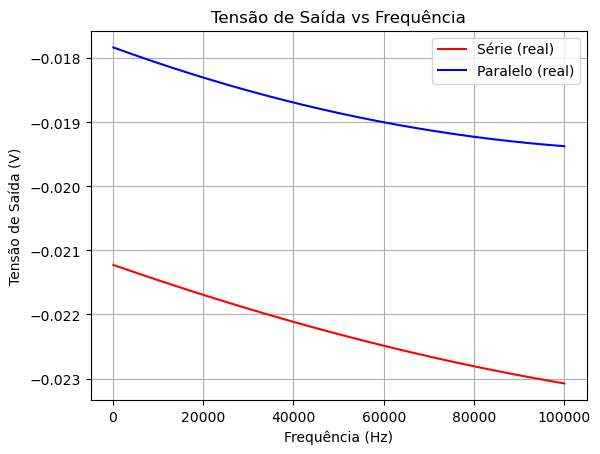

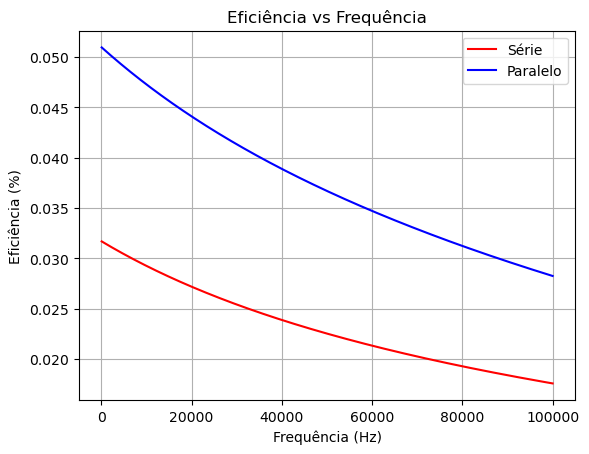

In [18]:
def plotar_grafico_tensao(frequencias_dic):
    frequencias_lista = []
    tensoes_serie = []
    tensoes_paralelo = []
    
    for frequencia, valores in frequencias_dic.items():
        i1s, i2s, V2s, V2si = valores[0]  # Série
        i1p, i2p, V2p, V2pi = valores[1]  # Paralelo
        
        # Armazenar frequências e tensões
        frequencias_lista.append(frequencia)
        tensoes_serie.append(V2s)
        tensoes_paralelo.append(V2p)
    
    # Plotar as tensões (real)
    plt.plot(frequencias_lista, [V.real for V in tensoes_serie], 'r-', label='Série (real)')
    plt.plot(frequencias_lista, [V.real for V in tensoes_paralelo], 'b-', label='Paralelo (real)')
    
    # Configurações de gráfico
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Tensão de Saída (V)')
    plt.title('Tensão de Saída vs Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()
plotar_grafico_tensao(frequencias_dic)
def plotar_grafico_eficacia(frequencias_dic):
    frequencias_lista = []
    eficiencias_serie = []
    eficiencias_paralelo = []
    
    for frequencia, valores in frequencias_dic.items():
        i1s, i2s, V2s, V2si = valores[0]  # Série
        i1p, i2p, V2p, V2pi = valores[1]  # Paralelo
        
        # Calcular potências de entrada e saída para série
        PentradaS = 0.5 * V1 * i1s.real
        PsaidaS = 0.5 * V2s.real * i2s.real
        eficienciaS = PsaidaS / PentradaS * 100
        
        # Calcular potências de entrada e saída para paralelo
        PentradaP = 0.5 * V1 * i1p.real
        PsaidaP = 0.5 * V2p.real * i2p.real
        eficienciaP = PsaidaP / PentradaP * 100
        
        # Armazenar valores
        frequencias_lista.append(frequencia)
        eficiencias_serie.append(eficienciaS)
        eficiencias_paralelo.append(eficienciaP)
    
    # Plotar as eficiências
    plt.plot(frequencias_lista, eficiencias_serie, 'r-', label='Série')
    plt.plot(frequencias_lista, eficiencias_paralelo, 'b-', label='Paralelo')
    
    # Configurações de gráfico
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Eficiência (%)')
    plt.title('Eficiência vs Frequência')
    plt.legend()
    plt.grid(True)
    plt.show()

plotar_grafico_eficacia(frequencias_dic)
